In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.arange(0.,6.)

In [3]:
w = torch.rand(1, requires_grad=True)

In [4]:
def f(x):
    return 3*x

In [5]:
y_true = f(x)

# Understanding the Loss and Parameters relationships

In [6]:
loss_list = []
w_grad = []
w_range = torch.arange(-5.,6., requires_grad=True)
for w_temp in w_range:
    y_pred = x*w_temp
    loss = (y_pred-y_true)**2
    loss_list.append(loss.mean())
    loss.mean().backward()

Text(0, 0.5, 'loss')

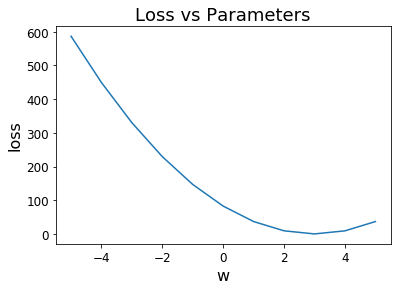

In [7]:
plt.plot(w_range.detach().numpy(), loss_list)
plt.title("Loss vs Parameters", fontsize=18)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('w', fontsize=16)
plt.ylabel('loss', fontsize=16)

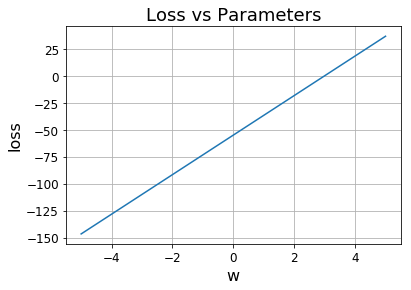

In [8]:
plt.plot(w_range.detach().numpy(), w_range.grad.numpy())
plt.title("Loss vs Parameters", fontsize=18)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('w', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.grid(True)

# Backpropagation

$ \large
\begin{align} 
\frac{\partial{J}}{\partial{w}} &= \frac{\partial{}}{\partial{w}}\sum_{i=0}^{N}(y_i-wx_i)^2 \\ 
\large &= 2\sum_{i=0}^{N}(y_i-wx_i)(-x_i)
\end{align}
$

In [9]:
def mse(y_true, y_pred):
    if len(y_true.shape) or len(y_pred.shape) == 1:
        y_true = y_true.view(-1,1)
        y_pred = y_pred.view(-1,1)
    delta = y_true - y_pred
    return (delta**2).mean()

In [10]:
w_history = []
wgrad_history = []
loss_history = []
loss_torch_history = []
lr = 1e-2


linear1 = torch.nn.Linear(1,1, bias=False)
param = linear1.parameters()
w = next(param)
for i in range(30):
    w_history.append(w.data.clone())    
    
    # Calculate Loss
    y_pred = linear1(x.view(-1,1))
    loss = mse(y_true, y_pred)
    loss_history.append(loss.data)
    
    # Calculate gradients
    loss.backward()
    wgrad_history.append(w.grad.data.clone())
    
    # Update parameters
    with torch.no_grad():
        w -= w.grad * lr
        
    w.grad.zero_()

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML

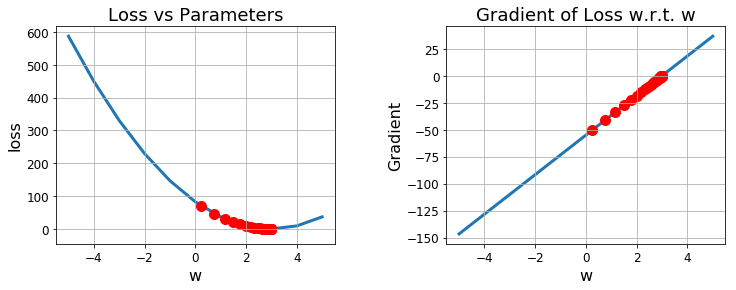

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
fig.subplots_adjust(wspace = 0.4)

ims = []

# LHS
im1, = ax1.plot(w_range.detach().numpy(), loss_list, linewidth=3,zorder=-1)
ax1.set_title("Loss vs Parameters", fontsize=18)
ax1.tick_params(axis='both', labelsize=12)
ax1.set_xlabel('w', fontsize=16)
ax1.set_ylabel('loss', fontsize=16)
ax1.grid(True)

# RHS
im2, = ax2.plot(w_range.detach().numpy(), w_range.grad.numpy(), linewidth=3, zorder=-1)
ax2.set_title("Gradient of Loss w.r.t. w", fontsize=18)
ax2.tick_params(axis='both', labelsize=12)
ax2.set_xlabel('w', fontsize=16)
ax2.set_ylabel('Gradient', fontsize=16)
ax2.grid(True)
for i in range(len(w_history)):
    im1 = ax1.scatter(w_history[i].detach(),loss_history[i], c='red', s=100,vmin=0, vmax=len(w_history), cmap='jet')
    im2 = ax2.scatter(w_history[i].detach(),wgrad_history[i], c='red', s=100,vmin=0, vmax=len(w_history), cmap='jet')
    ims.append([im1,im2])

In [13]:
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)

In [14]:
HTML(ani.to_html5_video())